In [1]:
import matplotlib as mpl
mpl.__version__

'3.5.1'

In [2]:
import pandas as pd
pd.__version__

'1.3.0'

In [3]:
import numpy as np
np.__version__

'1.19.5'

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import matplotlib.gridspec as gridspec
from IPython.display import HTML
import IPython as ip
ip.__version__

'7.29.0'

In [5]:
albums = pd.read_csv('data/albums.csv')
bands = pd.read_csv('data/bands.csv')
reviews = pd.read_csv('data/reviews.csv')

In [6]:
albums

,id,band,title,year
0,1,1,Taste the Hate,2014
1,2,3,The Bringer of Death,2014
2,3,4,Deception| Calculate What You Can't See,2005
3,4,7,Inti Huacay,1998
4,5,7,Génesis & horror,2002
...,...,...,...,...
28064,28065,37723,White Noise Paranormal,2010
28065,28066,37723,Anomalies of the Forest,2011
28066,28067,37723,Mother Earth Pantheon,2012
28067,28068,37723,Paganwinds,2014


In [7]:
rev = (reviews[['album','score']].set_index('album') *100).astype(np.int64)#
rev

,score
album,
4,88
5,96
8,83
45,80
54,92
...,...
28061,89
28065,80
28065,80


In [8]:
a = []
for i in rev.index.unique():
    if len(rev.loc[i]) > 1:
        a.append(round(rev.loc[i].mean()['score']))
    else:
        a.append(round(rev.loc[i].mean()))
a[0:5]

[88, 96, 83, 80, 92]

In [9]:
rev = pd.DataFrame({'album': rev.index.unique(), 'score': a})
rev

,album,score
0,4,88
1,5,96
2,8,83
3,45,80
4,54,92
...,...,...
7900,28058,91
7901,28061,89
7902,28065,80
7903,28066,80


In [10]:
df = albums.merge(bands, 
                  left_on='band', 
                  right_on='id', 
                  suffixes=(None,'_r')).drop(['band', 'id_r'], 
                                             axis=1).merge(rev, 
                                                           left_on='id', 
                                                           right_on='album', 
                                                           suffixes=(None,None), 
                                                           how ='left').drop('album', 
                                                                             axis=1).set_index('id').convert_dtypes()
df

,title,year,name,country,status,formed_in,genre,theme,active,score
id,,,,,,,,,,
1,Taste the Hate,2014,('M') Inc.,United States,Unknown,2009,Death Metal,<NA>,2009-?,<NA>
2,The Bringer of Death,2014,.F.O.A.D.,France,Active,2009,Death Metal,Life and Death,2009-present,<NA>
3,Deception| Calculate What You Can't See,2005,100 Suns,United States,Active,2004,Death Metal,<NA>,2004-present,<NA>
4,Inti Huacay,1998,1917,Argentina,Active,1994,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,1994-present,88
5,Génesis & horror,2002,1917,Argentina,Active,1994,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,1994-present,96
...,...,...,...,...,...,...,...,...,...,...
28065,White Noise Paranormal,2010,Frozen Mist,United States,Active,2004,Gothic Metal (2004-2006)| Melodic Death/Gothic...,Darkness| Despair| Death| Horror| Pagan Ancestry,2004-2014| 2014-2016| 2016-present,80
28066,Anomalies of the Forest,2011,Frozen Mist,United States,Active,2004,Gothic Metal (2004-2006)| Melodic Death/Gothic...,Darkness| Despair| Death| Horror| Pagan Ancestry,2004-2014| 2014-2016| 2016-present,80
28067,Mother Earth Pantheon,2012,Frozen Mist,United States,Active,2004,Gothic Metal (2004-2006)| Melodic Death/Gothic...,Darkness| Despair| Death| Horror| Pagan Ancestry,2004-2014| 2014-2016| 2016-present,70


In [11]:
def convert(list_):
    temp = []
    for i in list_:
        temp.extend(i)
    return temp

def remove_all(list_, value):
    while list_.count(value):
        list_.remove(value)
    return list_

def years(y):
    y = y.split('|')
    for i in range(len(y)):
        w = y[i].split('-', 1)
        for k in range(len(w)):
            if w[k].find('(') != -1 or w[k].find(')') != -1 or w[k].find('?') != -1: #ignoring changed name bands
                w[k] = None
            elif w[k].find('present') != -1:
                w[k] = 2017
            else:
                w[k] = int(w[k])
        w = remove_all(w, None)
        if len(w) == 0:
            y[i] = []
        elif len(w) == 1:
            y[i] = w
        elif len(w) == 2:
            y[i] = list(range(w[0], w[1] + 1))
       
    y = convert(y)
    return y

df['active'] = df['active'].fillna('?').apply(years)
df['active']

id
1                                                   [2009]
2        [2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...
3        [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
4        [1994, 1995, 1996, 1997, 1998, 1999, 2000, 200...
5        [1994, 1995, 1996, 1997, 1998, 1999, 2000, 200...
                               ...                        
28065    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28066    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28067    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28068    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28069    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
Name: active, Length: 28069, dtype: object

In [12]:
def themes(y):
    y = y.split('|')
    for i in range(len(y)):
        if y[i].startswith(' '):
            y[i] = y[i][1:]
    print(y)
    return y

df['theme'] = df['theme'].fillna('No Data').apply(themes)
df['theme']

['No Data']
['Life and Death']
['No Data']
['Dark Philosophical Poetry', 'Art', 'Religion', 'Psychology']
['Dark Philosophical Poetry', 'Art', 'Religion', 'Psychology']
['Dark Philosophical Poetry', 'Art', 'Religion', 'Psychology']
['Dark Philosophical Poetry', 'Art', 'Religion', 'Psychology']
['Dark Philosophical Poetry', 'Art', 'Religion', 'Psychology']
['Dark Philosophical Poetry', 'Art', 'Religion', 'Psychology']
['Dark Philosophical Poetry', 'Art', 'Religion', 'Psychology']
['Dark Philosophical Poetry', 'Art', 'Religion', 'Psychology']
['War', 'Death', 'Battles', 'Rape']
['War', 'Death', 'Battles', 'Rape']
['No Data']
['War', 'Religion', 'Bloodshed']
['Anti-Christianity']
['No Data']
['No Data']
['No Data']
['Death', 'Zombies', 'Religion', 'Horror']
['Death', 'Zombies', 'Religion', 'Horror']
['Death', 'Zombies', 'Religion', 'Horror']
['Death', 'Zombies', 'Religion', 'Horror']
['Death', 'Zombies', 'Religion', 'Horror']
['Death', 'Zombies', 'Religion', 'Horror']
['Death', 'Zombies',

['War', 'Spiritual', 'Society']
['No Data']
['No Data']
['No Data']
['Death', 'War', 'Destruction']
['Reality', 'Decadence', 'Death']
['Sci-fi', 'Apocalypse']
['No Data']
['Scotch whisky']
['Scotch whisky']
['No Data']
['No Data']
['Death', 'Struggles']
['Anti-Judeochristianity', 'Blasphemy']
['No Data']
['No Data']
['Death', 'Mysticism']
['Death', 'Mysticism']
['Madness', 'Fear', 'Darkness']
['Madness', 'Fear', 'Darkness']
['Society', 'Hypocrisy']
['Alien']
['No Data']
['No Data']
['Corruption', 'Nihilism']
['Corruption', 'Nihilism']
['Corruption', 'Nihilism']
['Death', 'Satan', 'Nonsense', 'Monkeys & Braunschweig']
['Death', 'Gore', 'Anti-religion']
['No Data']
['War', 'Torture', 'Murder', 'Death', 'Corruption']
['War', 'Torture', 'Murder', 'Death', 'Corruption']
['War', 'Torture', 'Murder', 'Death', 'Corruption']
['War', 'Torture', 'Murder', 'Death', 'Corruption']
['War', 'Torture', 'Murder', 'Death', 'Corruption']
['War', 'Torture', 'Murder', 'Death', 'Corruption']
['War', 'Torture

['No Data']
['No Data']
['No Data']
['No Data']
['Depression', 'Death']
['Sorrow', 'Love', 'Death']
['Sorrow', 'Love', 'Death']
['Society', 'Battles', 'Mysticism', 'Conflicts']
['No Data']
['No Data']
['Horror', 'Religion']
['Horror', 'Religion']
['Demons', 'Death', 'Destruction']
['Psycho', 'Mysteries', 'Gore', 'Murder', 'Violence']
['Psycho', 'Mysteries', 'Gore', 'Murder', 'Violence']
['Psycho', 'Mysteries', 'Gore', 'Murder', 'Violence']
['No Data']
['No Data']
['Gore', 'Violence', 'Porno', 'Slam', 'Rape']
['No Data']
['No Data']
['History', 'Mythology']
['No Data']
['No Data']
['No Data']
['Inner Struggles', 'Death', 'Anti-Religion', 'Society']
['Inner Struggles', 'Death', 'Anti-Religion', 'Society']
['Inner Struggles', 'Death', 'Anti-Religion', 'Society']
['Inner Struggles', 'Death', 'Anti-Religion', 'Society']
['Inner Struggles', 'Death', 'Anti-Religion', 'Society']
['Death', 'Religion', 'Society']
['The Mistreatment of Nature']
['The Mistreatment of Nature']
['No Data']
['No Data

['Mysticism', 'Chaos']
['No Data']
['No Data']
['Christianity']
['Christianity']
['Christianity']
['Dark romance', 'Anti-war', 'Symbolism']
['Pagan', 'Nature']
['Evil', 'Death', 'Anti-Christianity']
['Evil', 'Death', 'Anti-Christianity']
['Annihilation', 'Vengeance', 'Ancient Mythology']
['Gore', 'Kinky sex']
['Gore', 'Kinky sex']
['No Data']
['Symbolic', 'Society', 'Abstract']
['Symbolic', 'Society', 'Abstract']
["Dante's Inferno", 'Madness']
['No Data']
['Sick Humour', 'War', 'Genocide', 'Anti-Religion']
['No Data']
['No Data']
['No Data']
['Social Issues', 'Politics', 'War']
['Civilization', 'Spiritual Progression', 'Emotions']
['Civilization', 'Spiritual Progression', 'Emotions']
['Civilization', 'Spiritual Progression', 'Emotions']
['Civilization', 'Spiritual Progression', 'Emotions']
['Civilization', 'Spiritual Progression', 'Emotions']
['Civilization', 'Spiritual Progression', 'Emotions']
['Gore']
['Comedy', 'Urban Myth', 'Gore']
['Philosophy', 'Human Deception']
['No Data']
['N

['No Data']
['No Data']
['Gore', 'Pain', 'Death', 'Demons']
['Humor', 'Fun']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['Gore']
['Gore']
['Gore']
['Gore']
['War', 'Murder', 'Society']
['War', 'Murder', 'Society']
['War', 'Murder', 'Society']
['Zombies', 'Violence', 'Evil']
['Zombies', 'Violence', 'Evil']
['No Data']
['Zombies', 'Death', 'Cannibalism']
['No Data']
['Death', 'Pain', 'Religion']
['Middle-Ages']
['Life', 'Anger']
["Marele Izvoru' aka The Great Waterhole"]
["Marele Izvoru' aka The Great Waterhole"]
["Marele Izvoru' aka The Great Waterhole"]
['No Data']
['Horror', 'Death']
['Horror', 'Death']
['Society', 'Irony', 'Relationships', 'Sex']
['Society', 'Irony', 'Relationships', 'Sex']
['Darkness', 'Destruction', 'Death', 'War']
['No Data']
['No Data']
['Social', 'Political']
['No Data']
['Cannibalism', 'Zombie', 'Horror']
['Life', 'Death', 'Horror', 'Gore', 'Graphic'

['No Data']
['Society', 'Injustice']
['Light', 'Allegory', 'Absurd']
['Decay of Society', 'Philosophy', 'Personal Thoughts']
['Evil', 'Baphomet']
['Evil', 'Baphomet']
['Evil', 'Baphomet']
['History', 'Obliteration', 'Suppression', 'War']
['No Data']
['Personal Struggles', 'Life and Myths Related to Life']
['Philosphy', 'Romance', 'Misanthropy']
['Gore']
['No Data']
['Christianity']
['Hatred', 'Religion']
['Hatred', 'Religion']
['Death', 'Gore']
['No Data']
['No Data']
['No Data']
['Horror', 'Death', 'Metal']
['Greed', 'Corruption', 'Anger', 'Frustration', 'Distrust']
['Greed', 'Corruption', 'Anger', 'Frustration', 'Distrust']
['Greed', 'Corruption', 'Anger', 'Frustration', 'Distrust']
['Life', 'Social and Political Issues']
['Life', 'Social and Political Issues']
['No Data']
['No Data']
['No Data']
['No Data']
['Suicide', 'Exclusion']
['Psychopathology']
['Depression', 'Escapism', 'Darkness', 'Suicide', 'Drugs']
['Depression', 'Escapism', 'Darkness', 'Suicide', 'Drugs']
['Depression', 

['No Data']
['Nature', 'Anti-Christianity', 'the Ancients', 'Wisdom']
['No Data']
['No Data']
['Occultism', 'Gloom', 'Satanism', 'Mysticism', 'Witchcraft']
['Nihilism', 'Depression', 'Death']
['No Data']
['No Data']
['No Data']
['Murder', 'Destruction of the World', 'Lunacy', 'Satanic Magic']
['No Data']
['No Data']
['Fantasy Tales']
['Gore', 'Sex', 'Porn']
['Gore', 'Sex', 'Porn']
['Gore', 'Sex', 'Porn']
['Gore', 'Sex', 'Porn']
['Politics', 'Social Issues', 'Mankind']
['No Data']
['War', 'Genocide']
['War', 'Genocide']
['No Data']
['No Data']
['No Data']
['No Data']
['Weapons', 'War', 'Death']
['Weapons', 'War', 'Death']
['Inner struggles']
['War', 'Demonolatry', 'Immortality', 'Death']
['War', 'Demonolatry', 'Immortality', 'Death']
['Nuclear war', 'Horror']
['No Data']
['No Data']
['No Data']
['Anti-Christianity']
['Horror of the ancient gods', 'gore of war', 'lust']
['War', 'Politics']
['Satanism', 'Anti-christianity', 'Misanthropy']
['Satanism', 'Anti-christianity', 'Misanthropy']
[

['Sadness', 'Love', 'Death', 'Desperation', 'Darkness']
['Vampirism', 'Romanticism', 'Eroticism', 'Evil', 'Alchemy']
['Vampirism', 'Romanticism', 'Eroticism', 'Evil', 'Alchemy']
['Silence', 'Despair', 'Death']
['Silence', 'Despair', 'Death']
['No Data']
['No Data']
['No Data']
['Melancholy', 'Sadness']
['Feelings', 'Personal Issues']
['No Data']
['No Data']
['Tragedies', 'Homicide', 'Life Struggles']
['Death', 'Darkness', 'Sorrow']
['Death', 'Darkness', 'Sorrow']
['Death', 'Darkness', 'Sorrow']
['Introspection', 'Gothic Themes', 'North Saga']
['Introspection', 'Gothic Themes', 'North Saga']
['Zombies']
['Social Life', 'Mental Darkness']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['Death', 'Hell', 'Metal']
['Death', 'Pain', 'Horror', 'Relationships']
['Metal', 'Evil', 'War', 'Hate']
['No Data']
['No Data']
['No Data']
['No Data']
['Anger', 'Hate', 'Death']
['Anger', 'Hate', 'Death']
['Death', 'Suffering', 'Dissolution', 'Hatred', 'Negativity', 'Nihilism', 'F

['Hatred', 'Pain']
['Hatred', 'Pain']
['No Data']
['No Data']
['No Data']
['Christianity', 'Philosophy', 'Death']
['Christianity', 'Philosophy', 'Death']
['Christianity', 'Philosophy', 'Death']
['Philosophy', 'Spirituality', 'Discovery']
['No Data']
['Meditation', 'Dreams', 'Spirituality', 'Philosophy']
['Love', 'Faith', 'Society', 'Christianity', 'Folklore']
['Love', 'Faith', 'Society', 'Christianity', 'Folklore']
['Love', 'Faith', 'Society', 'Christianity', 'Folklore']
['Cosmos', 'Inner struggles', 'Future']
['Cosmos', 'Inner struggles', 'Future']
['Surrealism']
['Mental illnesses']
['Mental illnesses']
['No Data']
['Esotherics', 'Nature', 'Emotions']
['No Data']
['No Data']
['No Data']
['No Data']
['No Data']
['Christianity']
['Christianity']
['Societal Materialism', 'Individual Apathy']
['No Data']
['No Data']
['No Data']
['Anti-Religion', 'Death', 'Violence']
['Anti-Religion', 'Death', 'Violence']
['Anti-Religion', 'Death', 'Violence']
['War', 'Viking themes', 'Righteousness']
['W

['Orthodox Christianity', 'Theology']
['Orthodox Christianity', 'Theology']
['Orthodox Christianity', 'Theology']
['Life', 'Inner Struggles', 'Depression', 'Loneliness']
['Gore (early)', 'Love', 'Winter', 'Anguish (later)']
['Gore (early)', 'Love', 'Winter', 'Anguish (later)']
['Gore (early)', 'Love', 'Winter', 'Anguish (later)']
['Physical/Mental Torture', 'Suicide', 'Occultism']
['Physical/Mental Torture', 'Suicide', 'Occultism']
['Physical/Mental Torture', 'Suicide', 'Occultism']
['Death', 'Depression', 'Suicide']
['Death', 'Depression', 'Suicide']
['Death', 'Depression', 'Suicide']
['Death', 'Depression', 'Suicide']
['Death', 'Depression', 'Suicide']
['Death', 'Sex', 'Hatred']
['Death', 'Sex', 'Hatred']
['Death', 'Sex', 'Hatred']
['Death', 'Sex', 'Hatred']
['Darkness', 'Depression', 'Nature', 'Love']
['Darkness', 'Depression', 'Nature', 'Love']
['Darkness', 'Depression', 'Nature', 'Love']
['No Data']
['Anger', 'Hate', 'Inner Struggles']
['Satan', 'Death', 'Anti-Christianity', 'Occu

id
1                                                [No Data]
2                                         [Life and Death]
3                                                [No Data]
4        [Dark Philosophical Poetry, Art, Religion, Psy...
5        [Dark Philosophical Poetry, Art, Religion, Psy...
                               ...                        
28065    [Darkness, Despair, Death, Horror, Pagan Ances...
28066    [Darkness, Despair, Death, Horror, Pagan Ances...
28067    [Darkness, Despair, Death, Horror, Pagan Ances...
28068    [Darkness, Despair, Death, Horror, Pagan Ances...
28069    [Darkness, Despair, Death, Horror, Pagan Ances...
Name: theme, Length: 28069, dtype: object

In [13]:
countrys = df['country'].unique()
len_ = len(countrys) + 1
colors = {}
for i in range(len_):
    if i == len_ - 1:
        colors['Other'] = (0.6, 0.4, 0.8, 1.)
    else:
        colors[countrys[i]] = plt.cm.Spectral((i+1)/float(len_ - 1))
colors

{'United States': (0.6365244136870435,
  0.022683583237216455,
  0.26282199154171476,
  1.0),
 'France': (0.6534409842368321, 0.04144559784698193, 0.2668204536716648, 1.0),
 'Argentina': (0.6703575547866205,
  0.0602076124567474,
  0.27081891580161477,
  1.0),
 'Spain': (0.6872741253364091, 0.07896962706651288, 0.2748173779315648, 1.0),
 'Sweden': (0.7041906958861976, 0.09773164167627835, 0.27881584006151483, 1.0),
 'Australia': (0.7211072664359862,
  0.11649365628604381,
  0.28281430219146486,
  1.0),
 'Mexico': (0.7380238369857748, 0.1352556708958093, 0.28681276432141484, 1.0),
 'Italy': (0.7549404075355632, 0.15401768550557476, 0.29081122645136487, 1.0),
 'Germany': (0.7718569780853518, 0.17277970011534027, 0.2948096885813149, 1.0),
 'Bulgaria': (0.7887735486351404,
  0.19154171472510573,
  0.29880815071126493,
  1.0),
 'Chile': (0.8056901191849289, 0.21030372933487118, 0.3028066128412149, 1.0),
 'Czech Republic': (0.8226066897347175,
  0.22906574394463664,
  0.30680507497116494,
  

In [14]:
contains = np.vectorize(lambda a, b: a.__contains__(b))

df['country'][contains(df['active'], 2017)].value_counts().sum()

20241

In [15]:
regions = {'United States': 'NA', 'France': 'WE', 'Argentina': 'SA', 'Spain': 'SE', 'Sweden': 'NE', 'Australia': 'OCE', 'Mexico': 'CA',
 'Italy': 'SE', 'Germany': 'WE', 'Bulgaria': 'EE', 'Chile': 'SA', 'Czech Republic': 'EE', 'Brazil': 'SA', 'Colombia': 'SA', 'Indonesia': 'SEAS',
 'Finland': 'NE', 'United Kingdom': 'NE', 'Canada': 'NA', 'Belgium': 'WE', 'Poland': 'EE', 'Syria': 'WAS', 'Netherlands': 'WE',
 'Japan': 'EAS', 'Greece': 'SE', 'Costa Rica': 'CAR', 'Ukraine': 'EE', 'Russia': 'EE', 'Hungary': 'EE', 'India': 'SAS', 'Malaysia': 'SEAS',
 'Slovakia': 'EE', 'Venezuela': 'SA', 'Portugal': 'SE', 'Serbia': 'SE', 'Norway': 'NE', 'Austria': 'WE', 'Lithuania': 'EE', 'Panama': 'CA',
 'Switzerland': 'WE', 'Denmark': 'NE', 'Malta': 'SE', 'Nepal': 'SAS', 'International': 'INTER', 'El Salvador': 'CA', 'South Africa': 'SAF',
 'Macedonia (FYROM)': 'SE', 'Iran': 'WAS', 'Turkey': 'WAS', 'Philippines': 'SEAS', 'Albania': 'SE', 'Ecuador': 'SA', 'Kuwait': 'WAS',
 'Honduras': 'CA', 'Belarus': 'EE', 'Armenia': 'WAS', 'Tunisia': 'NAF', 'Singapore': 'SEAS', 'Latvia': 'EE', 'Peru': 'SA', 'Romania': 'EE',
 'Croatia': 'SE', 'Slovenia': 'SE', 'Uruguay': 'SA', 'Estonia': 'EE', 'New Zealand': 'OCE', 'Bolivia': 'SA', 'Ireland': 'NE', 'Botswana': 'SAF',
 'Korea| South': 'EAS', 'Saudi Arabia': 'WAS', 'Luxembourg': 'WE', 'Vietnam': 'SEAS', 'Paraguay': 'SA', 'Morocco': 'NAF', 'Israel': 'WAS',
 'Iceland': 'NE', 'Thailand': 'SEAS', 'Monaco': 'WE', 'Belize': 'CA', 'Algeria': 'NAF', 'Nicaragua': 'CA', 'Jersey': 'NE', 'Gibraltar': 'SE',
 'Bangladesh': 'SAS', 'Curaçao': 'CAR', 'Guatemala': 'CA', 'Dominican Republic': 'CAR', 'San Marino': 'SE', 'Bosnia and Herzegovina': 'SE',
 'Kazakhstan': 'CAS', 'Puerto Rico': 'CAR', 'Taiwan': 'EAS', 'Pakistan': 'SAS', 'Moldova': 'EE', 'Egypt': 'NAF', 'Lebanon': 'WAS',
 'Unknown': 'UNKNOWN', 'Cyprus': 'WAS', 'Åland Islands': 'NE', 'China': 'EAS', 'Kenya': 'EAF', 'Georgia': 'WAS', 'Jordan': 'WAS',
 'Liechtenstein': 'WE', 'Laos': 'SEAS', 'Cuba': 'CAR', 'Maldives': 'SAS', 'Andorra': 'SE', 'United Arab Emirates': 'WAS', 'Faroe Islands': 'NE',
 'Iraq': 'WAS', 'Guernsey': 'WE', 'New Caledonia': 'OCE', 'Sri Lanka': 'SAS', 'Montenegro': 'SE', 'Kyrgyzstan': 'CAS', 'Turkmenistan': 'CAS',
 'Azerbaijan': 'WAS', 'Bahrain': 'WAS', 'Reunion': 'EAF', 'Suriname': 'SA', 'Mongolia': 'EAS', 'Greenland': 'NA', 'Uzbekistan': 'CAS'} 
#written by hands, source - https://upload.wikimedia.org/wikipedia/commons/0/08/United_Nations_geographical_subregions.png
#NA - Northern America, SA - Southern America, CA - Central America, CAR - Caribbean.
#WE - Western Europe, SE - Southern Europe, NE - Northern Europe, EE - Eastern Europe.
#WAS - Western Asia, CAS - Central Asia, SAS - Southern Asia, EAS - Eastern Asia, SEAS - Southeastern Asia.
#NAF - Northern Africa, EAF - Eastern Africa, SAF - Southern Africa.
#OCE - Oceania(Australia + New Zeland + Melanesia + Polynesia + Micronesia).
#INTER - International, UNKNOWN - Unknown.
regions_names = ['NA', 'SA', 'CA', 'CAR', 'WE', 'SE', 'NE', 'EE', 'WAS', 
                 'CAS', 'SAS', 'EAS', 'SEAS', 'NAF', 'EAF', 'SAF', 'OCE', 'INTER', 'UNKNOWN']

In [16]:
len_ = len(regions_names)
colors_reg = {}
for i in range(len_):
    colors_reg[regions_names[i]] = plt.cm.Spectral((i+1)/float(len_ - 1))
colors_reg

{'NA': (0.7380238369857748, 0.1352556708958093, 0.28681276432141484, 1.0),
 'SA': (0.8472126105344099, 0.2612072279892349, 0.30519031141868513, 1.0),
 'CA': (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 'CAR': (0.9637831603229527, 0.47743175701653207, 0.28581314878892733, 1.0),
 'WE': (0.9845444059976932, 0.6273740868896577, 0.3550173010380622, 1.0),
 'SE': (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 'NE': (0.9956170703575548, 0.855363321799308, 0.5257208765859285, 1.0),
 'EE': (0.9977700884275279, 0.930872741253364, 0.6330642060745867, 1.0),
 'WAS': (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 'CAS': (0.944252210688197, 0.9777008842752788, 0.6620530565167244, 1.0),
 'SAS': (0.874740484429066, 0.9497116493656287, 0.6016147635524798, 1.0),
 'EAS': (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 'SEAS': (0.6122260668973474, 0.8438292964244523, 0.6439830834294502, 1.0),
 'NAF': (0.4530565167243369, 0.78

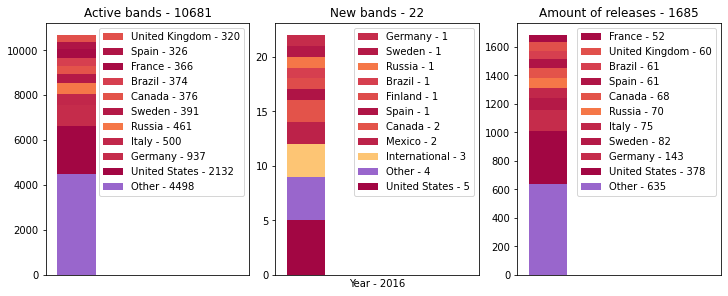

In [22]:
fig = plt.figure(figsize=(10, 4), constrained_layout=True)

class Animation():
  def __init__(self, fig):
    self.fig = fig 
    
    #self.gs0 = gridspec.GridSpec(2, 1, figure=fig)
    
    self.gs1 = gridspec.GridSpec(1, 3, figure=fig)
    
    self.active = fig.add_subplot(self.gs1[0])
    self.new = fig.add_subplot(self.gs1[1])
    self.release = fig.add_subplot(self.gs1[2])
    
    #self.all = fig.add_subplot(self.gs0[1])

  def update(self, year):
    #print(year)
    nums = 10
    self.active.clear()
    self.new.clear()
    self.release.clear()
    #self.all.clear()
    
    plt.title(f'Year - {year}')
    
    self.new.set_xlabel(f'Year - {year}')
    
    #active block start
    country = df['country'][df['name'][contains(df['active'], year)].drop_duplicates().index].value_counts()
    country['Other'] = country[nums:].sum()
    country=country.sort_values()[::-1][:nums + 1]
    sum_ = country.sum()
    if sum_:
        for l, v in country[::-1].items():
            self.active.bar(-4, sum_, label=f'{l} - {v}', width=1, color = colors[l])
            sum_ -= v
        self.active.set_xticks([])
        self.active.set_xlim(-4.8, 0.5)
        self.active.legend()
        self.active.set_title(f'Active bands - {country.sum()}')
    else:
        self.active.set_yticks([])
        self.active.set_xticks([])
        self.active.set_title(f'No active bands')
    #active block end
    
    #new block start
    country = df['country'][df['name'][df['formed_in'] == year].drop_duplicates().index].value_counts()
    country['Other'] = country[nums:].sum()
    country=country.sort_values()[::-1][:nums + 1]
    sum_ = country.sum()
    if sum_:
        for l, v in country[::-1].items():
            self.new.bar(-4, sum_, label=f'{l} - {v}', width=1, color = colors[l])
            sum_ -= v
        self.new.set_xticks([])
        self.new.set_xlim(-4.8, 0.5)
        self.new.legend()
        self.new.set_title(f'New bands - {country.sum()}')
    else:
        self.new.set_yticks([])
        self.new.set_xticks([])
        self.new.set_title(f'No new bands')
    #new block end
    
    #release block start
    country = df[df['year'] == year]['country'].value_counts()
    country['Other'] = country[nums:].sum()
    country=country.sort_values()[::-1][:nums + 1]
    
    sum_ = country.sum()
    if sum_:
        for l, v in country[::-1].items():
            self.release.bar(-4, sum_, label=f'{l} - {v}', width=1, color = colors[l])
            sum_ -= v
    
        self.release.set_xticks([])
        self.release.set_xlim(-4.8, 0.5)
        self.release.legend()
        self.release.set_title(f'Amount of releases - {country.sum()}')
    else:
        self.release.set_yticks([])
        self.release.set_xticks([])
        self.release.set_title(f'No releases')
    #release block end
    
    return self.fig

obj = Animation(fig)
anim = ani.FuncAnimation(fig, obj.update,
                         frames = range(1978, 2017),
                         repeat = False,
                         interval=500)


HTML(anim.to_html5_video()) #позиция в легенде совпадает с позицией на гистограмме

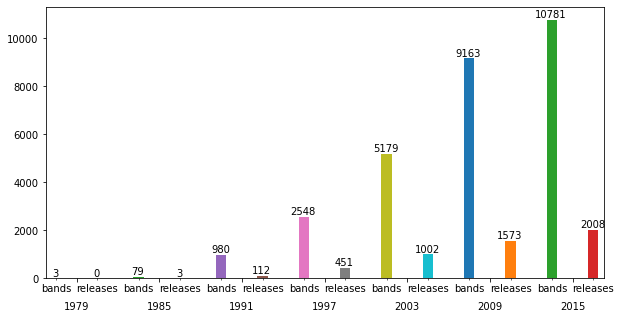

In [18]:
def numbs(n):
    return len(str(n))

fig = plt.figure(figsize=(10, 5))
all_ = fig.add_subplot(111)
years = [1979, 1985, 1991, 1997, 2003, 2009, 2015]
len_ = len(years)
all_.set_xlim(0, -2 + len_*8)
all_.set_xticks([1+i*4 for i in range(len_*2)], labels=['bands', 'releases']*len_, minor=True)
all_.set_xticks([3+i*8 for i in range(len_)], labels=[str(i) for i in years], y=-0.06)


for year, i in zip(years, range(len_)):
    country_b = df['country'][df['name'][contains(df['active'], year)].drop_duplicates().index].value_counts().sum()
    all_.bar(1+(i*8), country_b, width=1.0)
    plt.text(((3 - numbs(country_b))*0.3) + (i*8), country_b + 100, f'{country_b}')
    
    country_r = df[df['year'] == year]['country'].value_counts().sum()
    all_.bar(5+(i*8), country_r, width=1.0)
    plt.text(((3 - numbs(country_r))*0.3) + (i*8) + 4, country_r + 100, f'{country_r}')
    

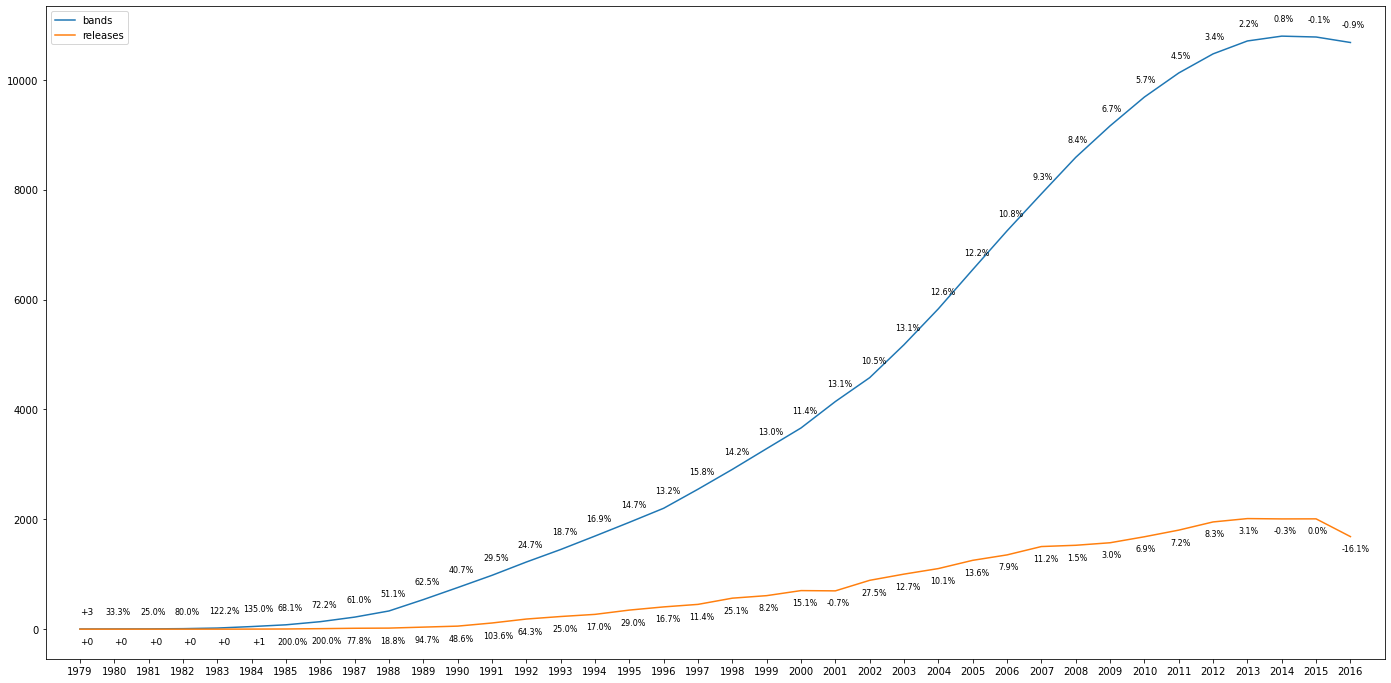

In [19]:
fig = plt.figure(figsize=(24,12))
all_ = fig.add_subplot(111)
countrys = []
years = range(1979, 2017)

all_.set_xticks(years)
all_.set_xlim(1978, 2017)
for year in years:
    countrys.append(df['country'][df['name'][contains(df['active'], year)].drop_duplicates().index].value_counts().sum())
    countrys.append(df[df['year'] == year]['country'].value_counts().sum())

for i in range(len(countrys)):
    if i % 2:
        if i == 1 or countrys[i - 2] == 0:
            plt.text(years[i // 2], countrys[i] - 270, f'+{countrys[i]}', fontsize=9)
        else:
            plt.text(years[i // 2] - 0.25, countrys[i] - 270, f'{round((countrys[i] - countrys[i-2]) / countrys[i-2] * 100, 1)}%', fontsize=8)
    else:
        if i == 0 or countrys[i - 2] == 0:
            plt.text(years[i // 2], countrys[i] + 270, f'+{countrys[i]}', fontsize=9)
        else:
            plt.text(years[i // 2] - 0.25, countrys[i] + 270, f'{round((countrys[i] - countrys[i-2]) / countrys[i-2] * 100, 1)}%', fontsize=8)
    
all_.plot(years, countrys[::2], label='bands')
all_.plot(years, countrys[1::2], label='releases')
all_.legend()

C:\Users\85D4~1\AppData\Local\Temp/ipykernel_12336/4170951787.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.last = pd.Series()


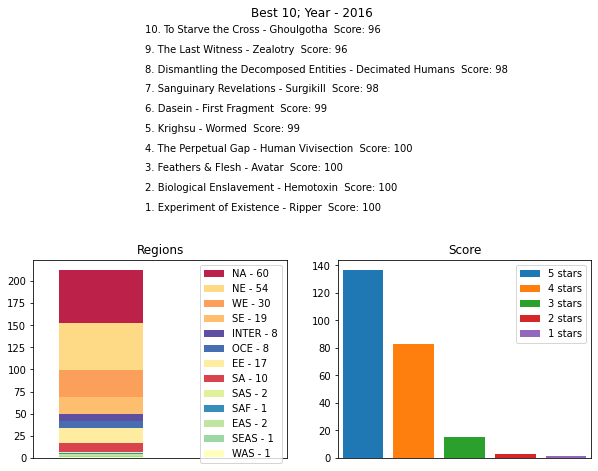

In [60]:
fig = plt.figure(figsize=(10, 8))

class Animation():
  def __init__(self, fig):
    self.fig = fig
    self.last = pd.Series()
    
    #self.ax = self.fig.add_subplot(212)
    
    
    self.gs0 = gridspec.GridSpec(2, 1, figure=self.fig)
    self.gs1 = self.gs0[1].subgridspec(1, 2)
    
    self.ax = self.fig.add_subplot(self.gs1[0])
    self.th = self.fig.add_subplot(self.gs1[1])
    self.ax2 = self.fig.add_subplot(self.gs0[0])
    
  def update(self, year):
    if year == 1983:
        return self.fig
    nums = 10
    
    self.ax.clear()
    self.th.clear()
    self.ax2.clear()
    
    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["bottom"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)    
    plt.gca().spines["left"].set_visible(False)
    
    self.ax2.set_xticks([])
    self.ax2.set_yticks([])
    self.ax2.set_title(f"Best 10; Year - {year}")
    self.ax2.set_ylim(-0.5, nums - 0.5)
    
    slice_ = df[df['year'] == year].sort_values('score').dropna()[::-1][0:nums]
    
    score_ = df[df['year'] == year].dropna()['score'].sort_values()[::-1]
    
    country = df[df['year'] == year].dropna()['country'].value_counts()
    
    for i, iter_ in zip(slice_.iterrows(), range(len(slice_))):
        self.ax2.text(0.2, iter_, f"{iter_ + 1}. {i[1]['title']} - {i[1]['name']}  Score: {i[1]['score']}")
    
    sum_ = country.sum()
    regs = {}
    for l, v in country.items():
        try:
            regs[regions[l]]
        except KeyError:
            regs[regions[l]] = 0
        regs[regions[l]] += v
    
    for k in regs:
        self.ax.bar(0.8, sum_, label=f'{k} - {regs[k]}', width=1, color=colors_reg[k])
        sum_ -= regs[k]
    self.ax.set_xticks([])
    self.ax.set_xlim(0, 3)
    self.ax.legend()
    self.ax.set_title('Regions')
        
    for i in range(5):
        self.th.bar(i, score_[score_.between(80 - 20*i, 100 - 20*i)].count(), label = f'{5 - i} stars')
        
    self.th.set_xticks([])
    self.th.set_xlim(-0.5, 4.5)
    self.th.legend()
    self.th.set_title('Score')
    
    return self.fig

obj = Animation(fig)
anim = ani.FuncAnimation(fig, obj.update,
                         frames = range(1983, 2017),
                         repeat = False,
                         interval=500)


HTML(anim.to_html5_video())